## Practical Exercises

We are going to work on a different dataset from the theory. It's a dataset oriented to housing properties on sale in Melbourne, Australia. Each row registers a sold property and each column its properties.

In [5]:
import pandas as pd

melb_housing_df = pd.read_csv("../data/melb_housing_df.csv")

# If you are using google colab use this code to load the dataframe.
# url = "https://raw.githubusercontent.com/benjaminocampo/CDL_data_visualization/main/data/melb_housing_df.csv"
# melb_housing_df = pd.read_csv(url)

**Exercises**:

**1)** Remove outliers of the random variable `housing_price` by filtering out
all those instances which are 2.5 standard deviations apart from the mean. That
is, given an instance $x$ and mean $\overline{x}$ and standard deviation
$\sigma$, $x$ is **not** considered **an outlier** iff:

$$|x - \overline{x}| \leq 2.5 \times \sigma $$

Apply the filter by updating the dataframe `melb_housing_df`.
Plot boxplots before and after removing outliers.


**2)** Using the filtered dataframe `melb_housing_df` of exercise 1) and the
columns `housing_seller_agency` and `housing_price`, obtain the total collected
money of the seller sales. Then, select the sellers with the 10 highest earnings
(Top 10 best sellers) and create a `barplot` using `seaborn`.

**3)** Create a `barplot` using `seaborn` that compares on the X ax the agency
of these 10 sellers and their average property price. Plot the barplot in the same order as exercise 2.

**4)** Create the same `barplot` but this time using `plotly`. Remember that a
barplot performs an aggregation that in seaborn is done automatically, but in
Plotly, you'll have to make the aggregation before with pandas. Do not consider
the error bars for this plot.

<Axes: xlabel='housing_price', ylabel='Count'>

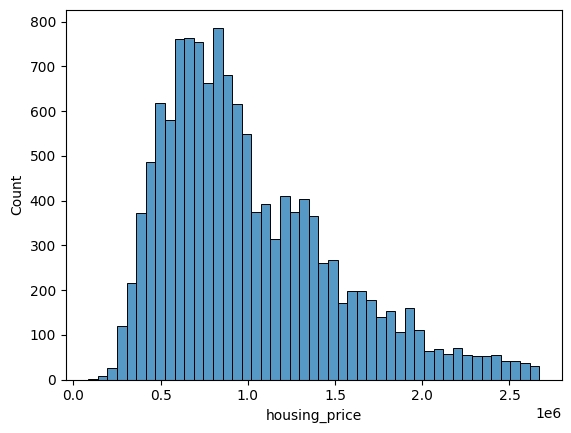

In [6]:
import seaborn 
import matplotlib.pyplot as plt

seaborn.histplot(melb_housing_df["housing_price"])

<Axes: ylabel='housing_price'>

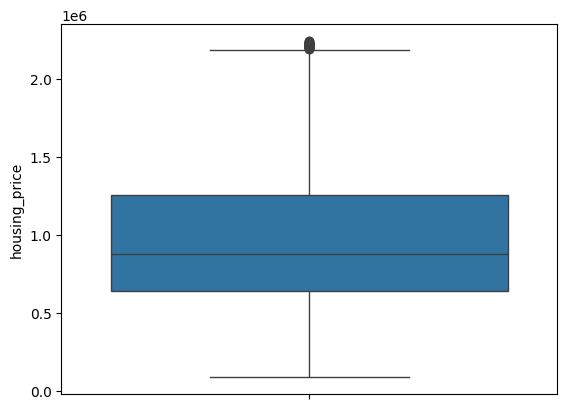

In [7]:
# 1

mean_price = melb_housing_df['housing_price'].mean()
std_price = melb_housing_df['housing_price'].std()

lower_limit = mean_price - 2.5 * std_price
upper_limit = mean_price + 2.5 * std_price


melb_housing_df_no_outlier = melb_housing_df[
    (melb_housing_df['housing_price'] >= lower_limit) & 
    (melb_housing_df['housing_price'] <= upper_limit)
]

seaborn.boxplot(melb_housing_df_no_outlier["housing_price"])


Text(0.5, 1.0, 'Total Earnings of top 10 best sellers')

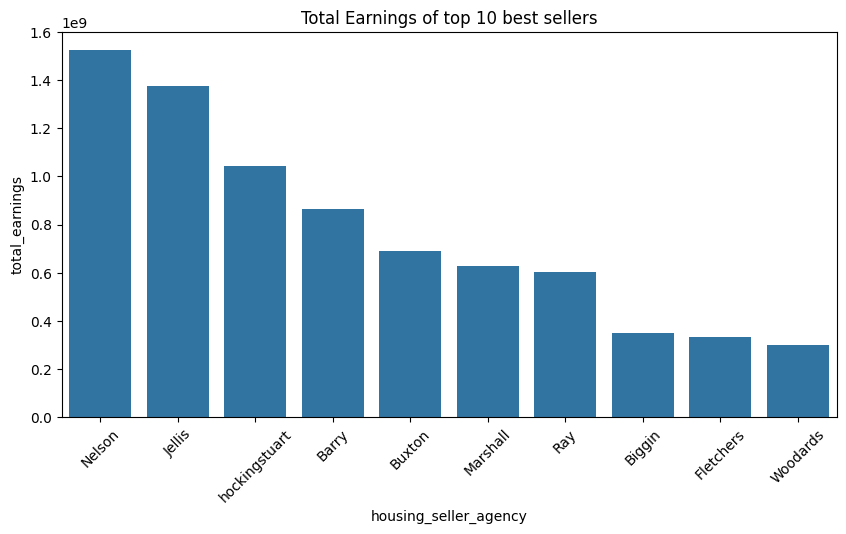

In [8]:
# 2 

seller_earnings = melb_housing_df_no_outlier.groupby('housing_seller_agency')['housing_price'].sum().reset_index()

# Rename the column for clarity
seller_earnings.rename(columns={'housing_price': 'total_earnings'}, inplace=True)

# Sort the sellers by total earnings in descending order
top_sellers = seller_earnings.sort_values(by='total_earnings', ascending=False).head(10)


plt.figure(figsize=(10,5))
seaborn.barplot(x="housing_seller_agency",y="total_earnings",data=top_sellers)
plt.xticks(rotation=45)
plt.title("Total Earnings of top 10 best sellers")


Text(0.5, 1.0, 'Average Property Price of top 10 best sellers')

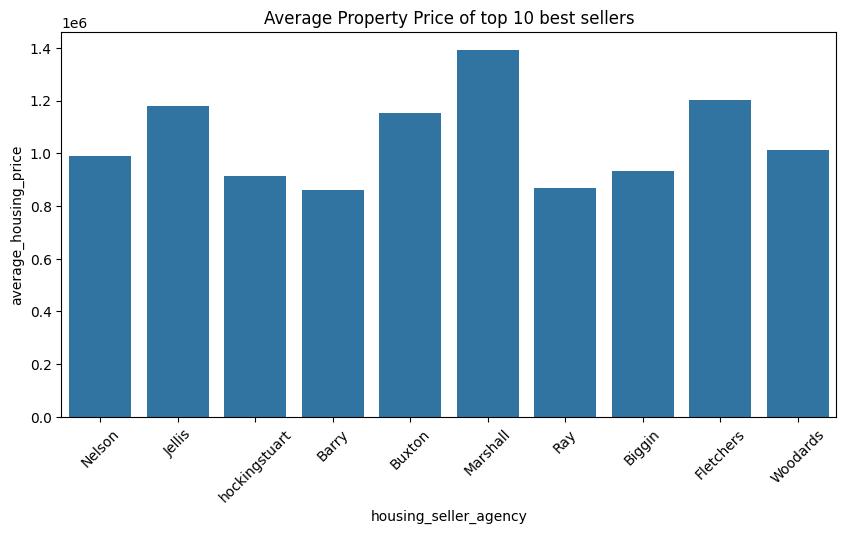

In [12]:

# **3)** Create a `barplot` using `seaborn` that compares on the X ax the agency
# of these 10 sellers and their average property price.

avg_property_price = melb_housing_df_no_outlier.groupby('housing_seller_agency')['housing_price'].mean().reset_index()
avg_property_price.rename(columns={'housing_price': 'average_housing_price'}, inplace=True)
avg_property_price_top = avg_property_price[avg_property_price["housing_seller_agency"].isin(top_sellers["housing_seller_agency"])]
# avg_property_price_top = avg_property_price_top


plt.figure(figsize=(10,5))
seaborn.barplot(x="housing_seller_agency",y="average_housing_price",data=avg_property_price_top,order=top_sellers["housing_seller_agency"].values)
plt.xticks(rotation=45)
plt.title("Average Property Price of top 10 best sellers")

In [14]:
import plotly.express as px
import pandas as pd

# Extract the ordered list of agencies from top_sellers
ordered_agencies = top_sellers['housing_seller_agency'].values

# Filter the original dataframe for the top 10 sellers
filtered_df = melb_housing_df[melb_housing_df['housing_seller_agency'].isin(ordered_agencies)]

# Group by agency and calculate the average property price
avg_property_price_top = filtered_df.groupby('housing_seller_agency')['housing_price'].mean().reset_index()

# Sort avg_property_price_top by the order of agencies in ordered_agencies
avg_property_price_top = avg_property_price_top.set_index('housing_seller_agency').reindex(ordered_agencies).reset_index()

# Create the barplot using Plotly
fig = px.bar(
    avg_property_price_top,
    x='housing_seller_agency',
    y='housing_price',
    color='housing_seller_agency',
    category_orders={'housing_seller_agency': ordered_agencies},  # Ensure the order
    labels={'housing_seller_agency': 'Housing Seller Agency', 'housing_price': 'Average Property Price'},
    title='Top 10 Sellers: Average Property Price Ordered by Total Earnings'
)

# Show the plot
fig.show()
